<a href="https://colab.research.google.com/github/siddahnt1025/Telecom-Churn-Analysis-By-siddhant-mehra/blob/main/Copy_of_Telecom_Churn_Analysis_By_siddhant_mehra_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING DATA AND IMPORTING MODULES**

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline


In [4]:
# mounting drive
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
telecom_df = pd.read_csv('/content/drive/MyDrive/Telecom_Churn.csv')

In [6]:
#convert string values of churn coloumn to 1 and 0
telecom_df.loc[telecom_df.Churn=='No','Churn'] = 0
telecom_df.loc[telecom_df.Churn=='Yes','Churn'] = 1

**UNDERSTANDING MORE OF DATA**

In [7]:
#data of top 5 rows
telecom_df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#data of bottom rows
telecom_df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [9]:
#getting shape of data set
print(telecom_df.shape)

(3333, 20)


In [10]:
#getting all coloumns
print("Features of the dataset:")
telecom_df.columns

Features of the dataset:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**STATE** - 51 UNIQUE NAME

**ACCOUNT LENGTH** - LENGTH OF ACCOUNT

**AREA CODE** - CODE NUMBER OF THE AREA

**INTERNATIONAL PLAN** - YES INDICATE PRESENT AND NO INDICATE PLAN IS NOT PRESENT

**VOICE MAIL PLAN** - YES INDICATE PRESENT AND NO INDICATE PLAN IS NOT PRESENT

**NUMBER VMAIL MESSAGES** - NUMBER OF VOICE MAIL  MESSAGES RANGING FROM 0 TO 50

**TOTAL DAY MINUTES** - TOTAL NUMBER OF CALLS MADE IN MORNING

**TOTAL DAY CALLS** - TOTAL NUMBER OF CALLS MADE

**TOTAL DAY CHARGE** - TOTAL CHARGE OF COSTUMERS IN MORNING

**TOTAL EVE MINUTES** - TOTAL NO OF MINUTES SPENT IN EVENING

**TOTAL EVE CALLS** - TOTAL NUMBER OF CALLS MADE IN EVENING

**TOTAL EVE CHARGE** - TOTAL CHARGE OF COSTUMERS IN MORNING

**TOTAL NIGHT MINUTES**- TOTAL NO OF MINUTES SPENT IN NIGHT

**TOTAL NIGHT CALLS** - TOTAL NUMBER OF CALLS MADE IN NIGHT

**TOTAL NIGHT CHARGE** - TOTAL CHARGE OF COSTUMERS AT NIGHT

**COSTUMER SERVICE CALLS** - NUMBER OF SERVICE CALLS MADE BY COSTUMER

**CHURN** - TRUE MEANS CHURNED COSTUMERS AND FALSE MEANS RETAINED COSTUMERS

In [11]:
#getting all datatypes pf all the coloumns
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                      object
dtype: object

In [12]:
#check details about the data set
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [13]:
telecom_df.nunique()


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [14]:
#Looking for the description of the dataset to get insights of the data
telecom_df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [15]:
#print the count of true and false in 'churn' feature
print(telecom_df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


**CHECKING FOR MISSING AND DUPLICATE VALUES**

In [16]:
#CHECK FOR COUNT OF MISSING VALES IN EACH COLOUMN
telecom_df.isna().sum()
telecom_df.isnull().sum()
#no missing values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



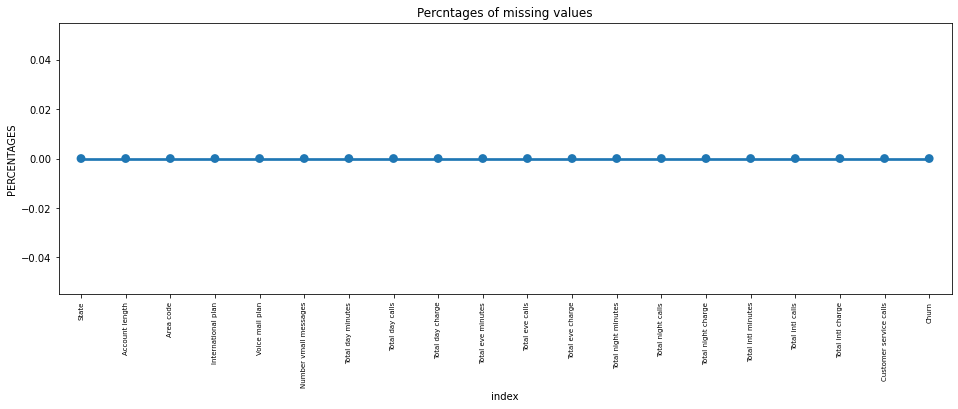

In [17]:
#% of missing values
missing = pd.DataFrame((telecom_df.isnull().sum())*100/telecom_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90,fontsize =7)
plt.title("Percntages of missing values")
plt.ylabel("PERCENTAGES")
plt.show()

In [18]:
# checking Duplicates Values
len(telecom_df[telecom_df.duplicated()])

0

**As of now There are 3333rows and 20 coloums in above dataset.**

**out of which there are 1 boolean data type ie: churn**

**8 float data type,**

**8 integer datat type,**

**3 obj data type ie: catagarical value are there**

**there are no missing and duplicates values**

**EXPLORATORY DATA ANALYSIS OF THE DATA SET**

In [19]:
#printing the unique value inside "churn" coloumn
telecom_df["Churn"].unique()

array([False, True], dtype=object)

In [20]:
#printing count of true & false in churn feature
print(telecom_df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


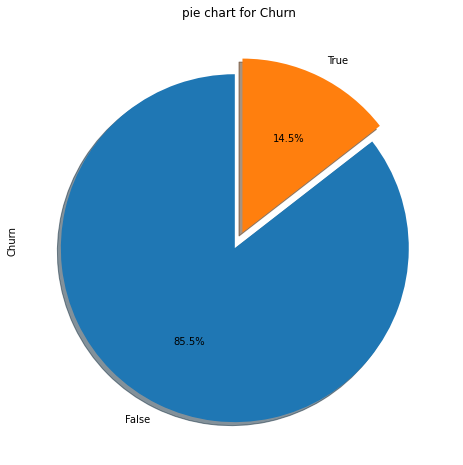

In [21]:
#pie chart formation
telecom_df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90,shadow=True , figsize=(8,8))
plt.title('pie chart for Churn')
plt.show()

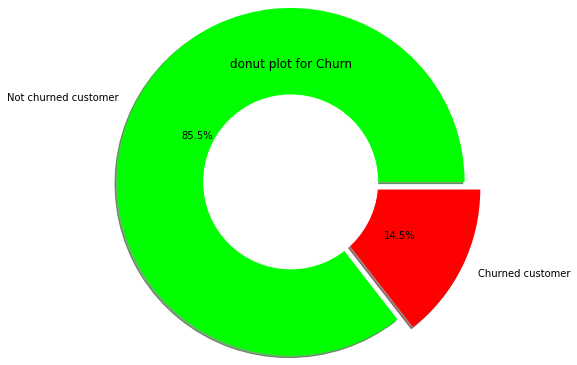

In [22]:
#to get the donut plot to analize churn
data = telecom_df['Churn'].value_counts()
explode = (0,0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['lime','red'])
circle = plt.Circle( (0,0),1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('donut plot for Churn')
plt.show()

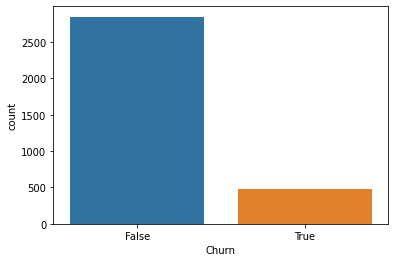

In [23]:
#churn by using counplot
sns.countplot(x=telecom_df.Churn)

**ANALYSING STATE COLOUMN**

In [24]:
#printing the unique value of state coloumn
telecom_df['State'].nunique()


51

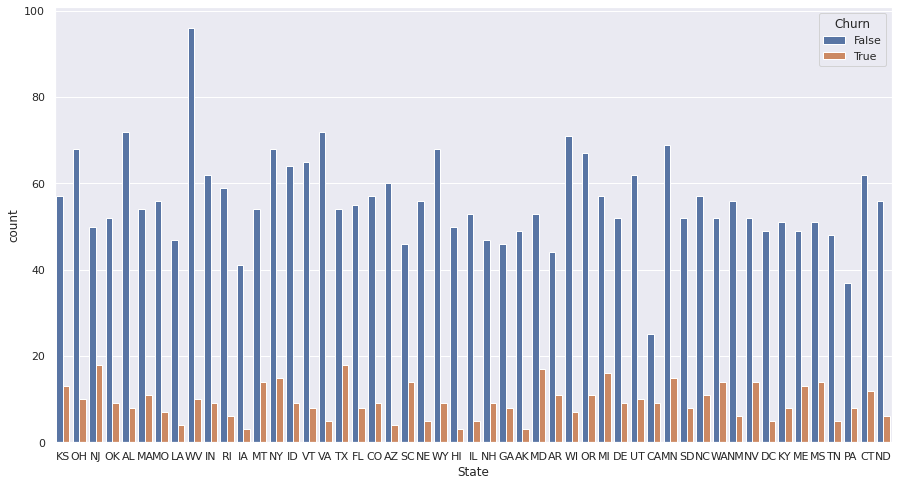

In [25]:
#comparision churn by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=telecom_df)
plt.show()


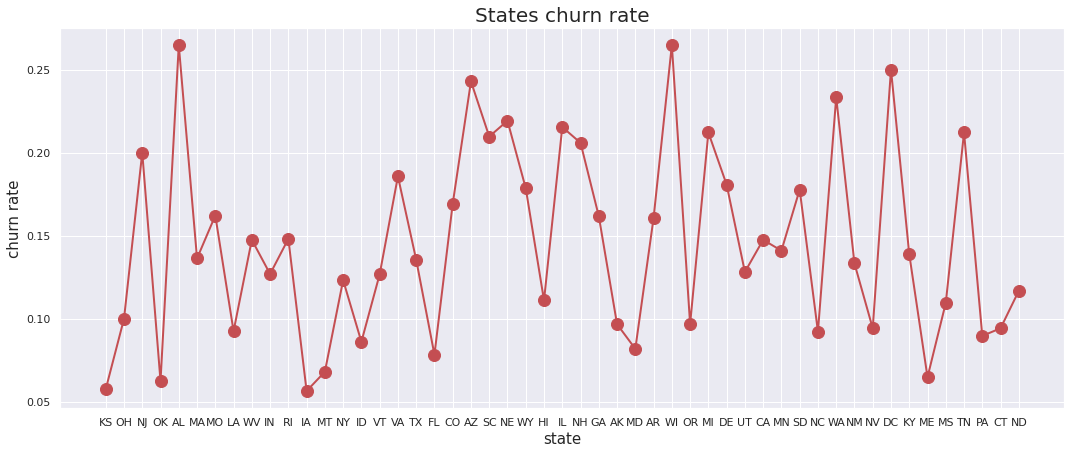

In [26]:
s1=telecom_df['State'].unique()
s2=telecom_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize']= (18,7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title("States churn rate",fontsize = 20)
plt.xlabel('state',fontsize = 15)
plt.ylabel('churn rate',fontsize = 15)
plt.show()

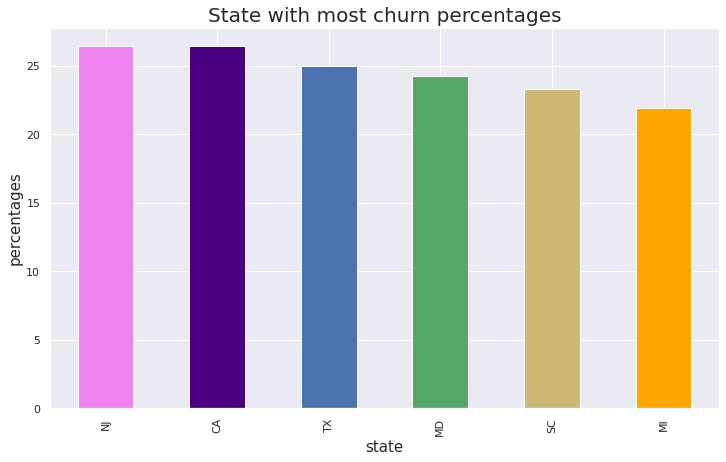

In [27]:
plt.rcParams['figure.figsize']= (12,7)
color = plt.cm.copper(np.linspace(0, 0.5 , 20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title("State with most churn percentages", fontsize = 20)
plt.xlabel('state',fontsize = 15)
plt.ylabel('percentages',fontsize = 15)
plt.show()


In [28]:
from pandas.core.arrays.numeric import T
#calculate state vs churn percentage%
State_data = pd.crosstab(telecom_df["State"],telecom_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [29]:
#most churned state of the top 10 list ascending
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

**ANALYSING"AREA CODE"**


In [30]:
#Calculate Area code vs churn percentages
Area_code_data = pd.crosstab(telecom_df["Area code"],telecom_df["Churn"])
Area_code_data['percentage_Churn']= Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


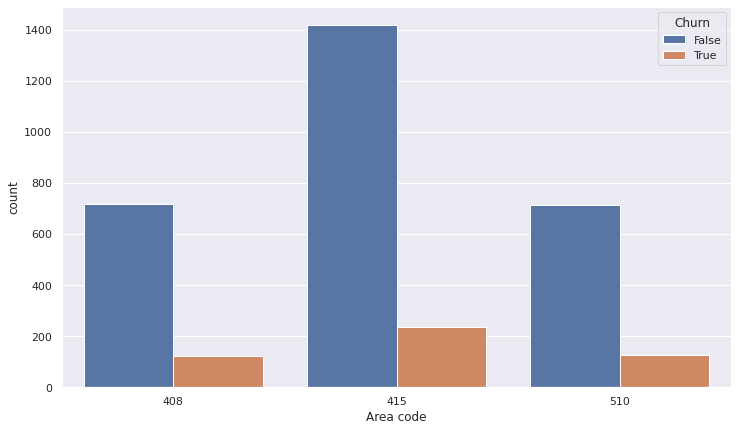

In [31]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue ="Churn", data=telecom_df)
plt.show()

**ANALISING ACCOUNTING LENGTH**

In [32]:
# SEPERATING CHURN AND NON CHURN COSTUMERS
churn_df     = telecom_df[telecom_df["Churn"] == bool(True)]
not_churn_df = telecom_df[telecom_df["Churn"] == bool(False)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



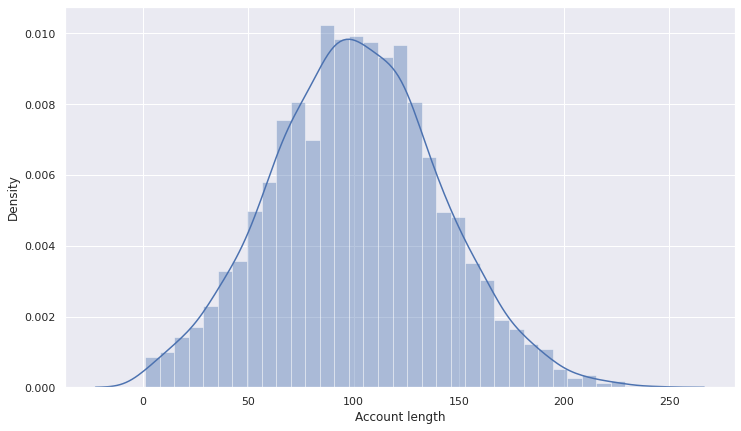

In [33]:
#account length vs Churn
sns.distplot(telecom_df['Account length'])


**ALALYSING INTERNATIONAL PLAN**

In [34]:
#SHOW COUNT VALUE OF YES OR NO
telecom_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [35]:
#unique data in it International plan
telecom_df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
#calculate the International plan vs Churn Percentage
International_plan_data = pd.crosstab(telecom_df["International plan"],telecom_df["Churn"])
International_plan_data['Percentage Churn']= International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


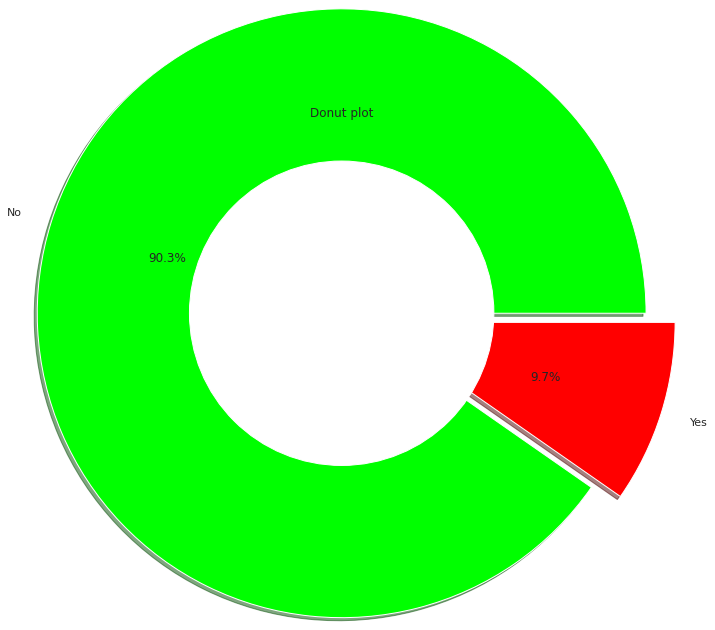

In [37]:
#to get donut plot for International_plan_data
data = telecom_df['International plan'].value_counts()
explode = (0,0.2)
plt.pie(data,explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['lime','red'])
circle = plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut plot')
plt.show()

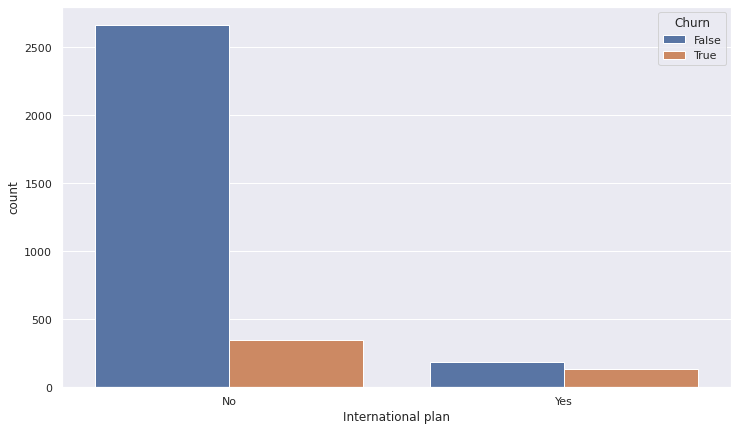

In [38]:
#analyzing by using countplot
sns.countplot(x='International plan',hue="Churn",data = telecom_df)

**ANALYSING VMAIL MESSAGES**

In [39]:
#data show
telecom_df['Number vmail messages'].unique()


array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [40]:
#printing data
telecom_df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [41]:
#details of voice mail
telecom_df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



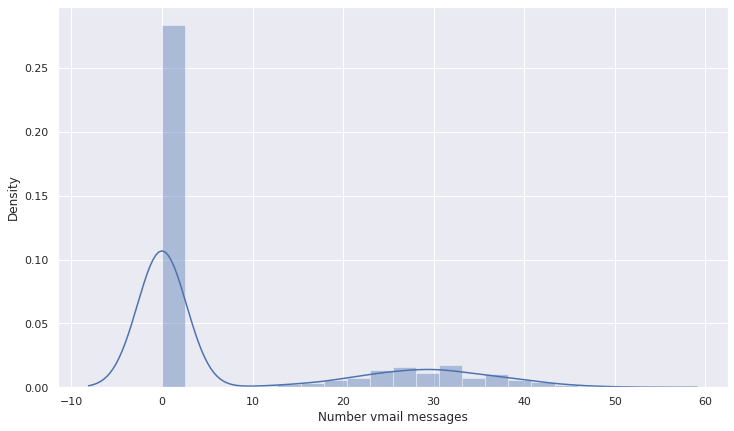

In [42]:
#analysing by usnig displot diagram
sns.distplot(telecom_df['Number vmail messages'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



<Figure size 720x576 with 0 Axes>

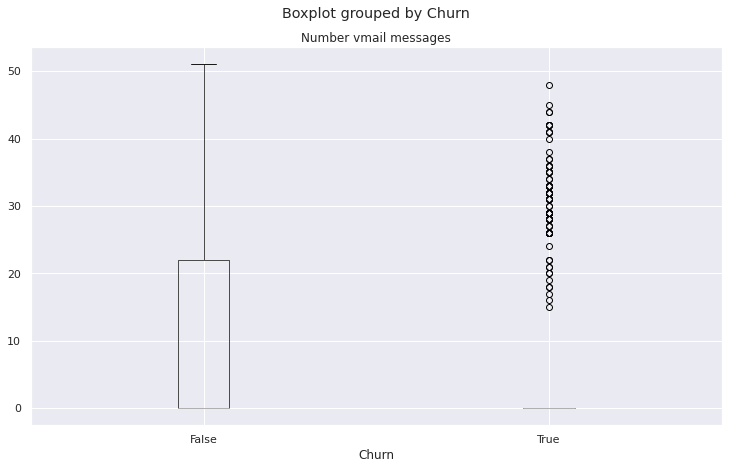

In [43]:
#analysing by using boxplot
fig = plt.figure(figsize = (10,8))
telecom_df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail messages', fontsize=14,fontweight='bold')
plt.show()

**ANALYSING SERVICE CALLS**

In [44]:
#PRITING DATA
telecom_df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [45]:
#Customer service calls vs churn percentages
Customer_service_calls_data = pd.crosstab(telecom_df['Customer service calls'],telecom_df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)



Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


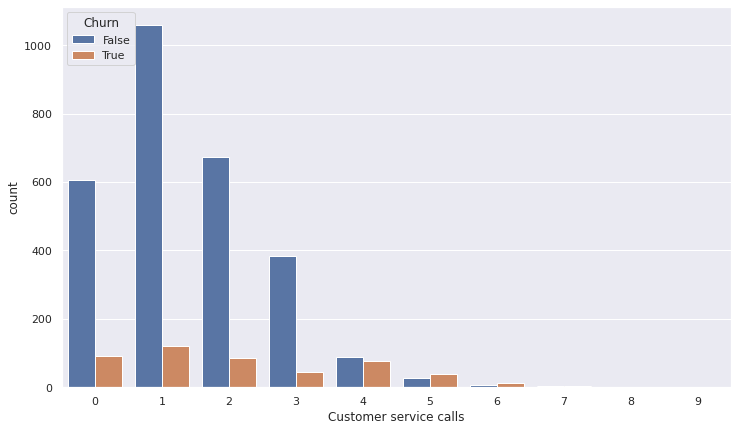

In [46]:
#analysing using countplot
sns.countplot(x='Customer service calls', hue="Churn",data = telecom_df)

**CONCLUSION:**

***After performing exploratory data analysis on the data set, this is what we have incurred drom data*** 


*   There are some states where the churn rate is high as compared to others may be due to low network coverage.
*   Area code and account length do not play any kind of role reagarding the churn rate so , it's redundant data coloumns


*   in the International plan those costumers who have this plan are churn more and also the International calling charges are also high so the costumers who has the plan unsatisfied whith network issue and high call charge
*   In Voice mail section when there are more than 20 voice-mail messages then there is a churn so its basically means that the quality of the voice mail is not good


*   Total day call minutes,total day calls,Total day charge,total eve minutes,Total eve calls,total eve charge,Total night minutes,Total night calls, total  night charge,These coloums didn't play any kind of role regarding churn rate 
*   In International calls data shows that the churn rate of those costumers is high,those who take the International plan so it means that in International calls charges are high also there is a call drop or network issue.

**RECCOMENDATIONS:**


*   Improve network coverage churned state
*   In International plan provide some discount plan to costumer
*   Improve the voice mail quality or take feedback from the costumers
*   Improve the services of call center and take frequent feedback from the costumer regarding there issues.












